In [1]:
import sys

sys.path += ['../src']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from scipy.stats import shapiro

from data_structures.constants import TickCol, BarCol, BarUnit
import data_structures.bars as bars

In [3]:
PRICE_COL = 'vwap'

def cap_cols(df):
    return df.rename(columns=str.capitalize)

def compute_log_returns(series):
    return np.diff(np.log(series))

# Autocorrelation tests
def pearson_autocorr(series, lag=1):
    return pd.Series(series).autocorr(lag=lag)

def durbin_watson_stat(series):
    return durbin_watson(series)

# Normality of returns tests
def jarque_bera_pval(series):
    return jarque_bera(series)[1]

def shapiro_wilk_pval(series):
    return shapiro(series)[1]

In [4]:
df = pd.read_csv('../data/trade_20220920.csv')
df = df[df['symbol'] == 'XBTUSD']
df['timestamp'] = pd.to_datetime(df['timestamp'].str.slice(0, -3), format='%Y-%m-%dD%H:%M:%S.%f')

ticks = df[['timestamp', 'price', 'foreignNotional']]
ticks = ticks.rename(columns={'foreignNotional': 'volume'})
ticks = ticks.reset_index(drop=True)

In [6]:
df.head()

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
132123,2022-09-20 00:00:00.277243,XBTUSD,Sell,1600,19533.0,MinusTick,2bf699c8-4be5-a685-0c6d-3ea2ba9ad2b6,8191264,0.081913,1600.0
132124,2022-09-20 00:00:00.277243,XBTUSD,Sell,100,19533.0,ZeroMinusTick,1354a777-6fa2-a06a-c733-1fffcdc4dc4f,511954,0.005120,100.0
132125,2022-09-20 00:00:00.277243,XBTUSD,Sell,300,19533.0,ZeroMinusTick,489c2611-8dbc-a395-fca4-871989aac8bc,1535862,0.015359,300.0
132126,2022-09-20 00:00:00.277243,XBTUSD,Sell,7500,19533.0,ZeroMinusTick,20ee6efc-d658-9bd3-4788-f88896181625,38396550,0.383966,7500.0
132127,2022-09-20 00:00:00.277243,XBTUSD,Sell,200,19533.0,ZeroMinusTick,4ed84ae3-20f3-45ee-68f5-830a46632486,1023908,0.010239,200.0


<AxesSubplot:xlabel='timestamp'>

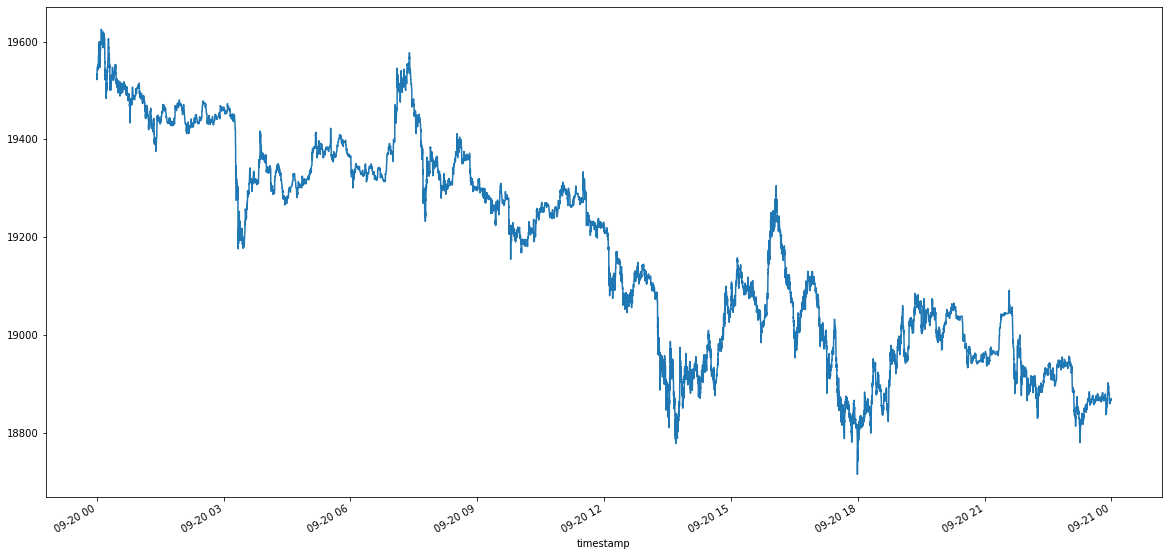

In [7]:
ticks.set_index('timestamp')['price'].plot(figsize=(20, 10))

## Standard Bars

### Time Bars

In [9]:
agg_bars = bars.aggregate_time_bars(ticks, '15min')

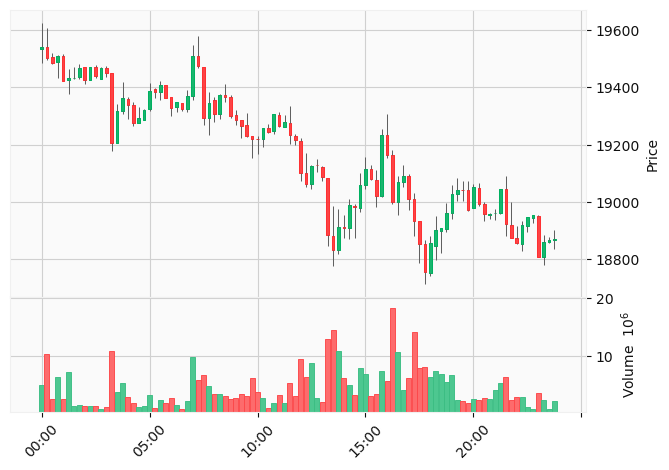

In [10]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

In [11]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])

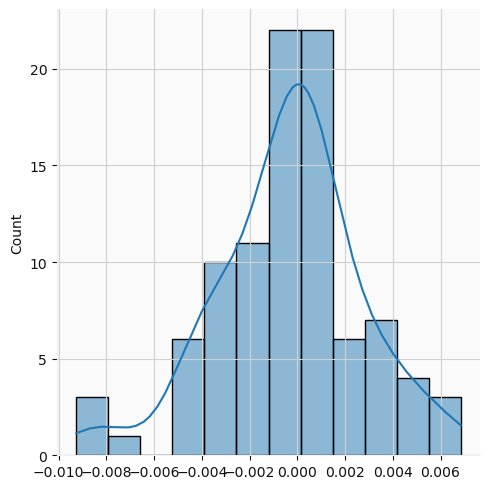

In [12]:
sns.displot(log_returns, kde=True)

In [13]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.1006512275308938
Durbin-Watson Statistic: 1.7697788901703138
Jarque-Bera p-value 0.1648023150871909
Shapiro-Wilk p-value 0.087442547082901


### Tick Bars

In [154]:
agg_bars = bars.aggregate_tick_bars(ticks, 1000)

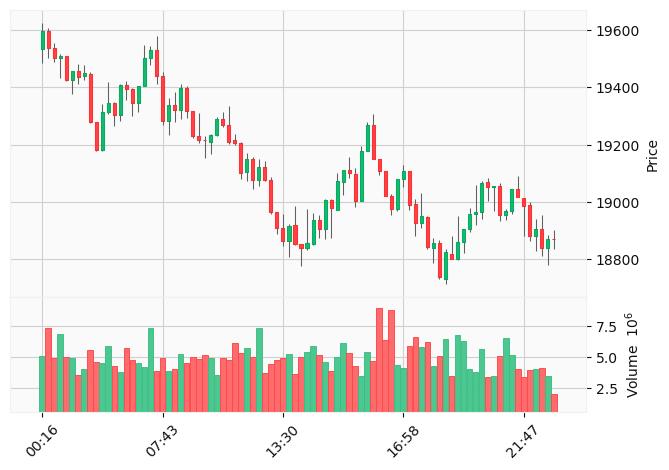

In [155]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

In [156]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])

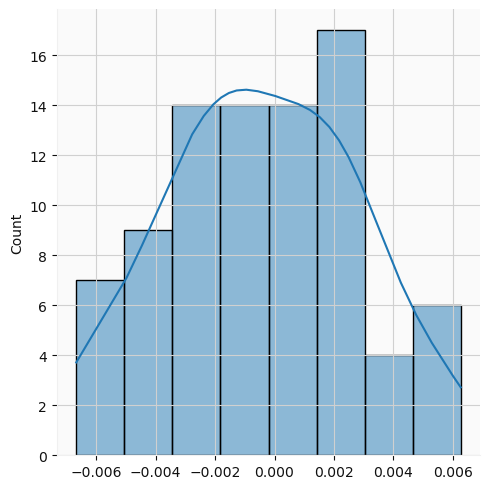

In [157]:
sns.displot(log_returns, kde=True)

In [158]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.071288119681103
Durbin-Watson Statistic: 1.8162829823019364
Jarque-Bera p-value 0.445414843582689
Shapiro-Wilk p-value 0.4742499589920044


### Volume Bars

In [74]:
agg_bars = bars.aggregate_volume_bars(ticks, 5*10**6)

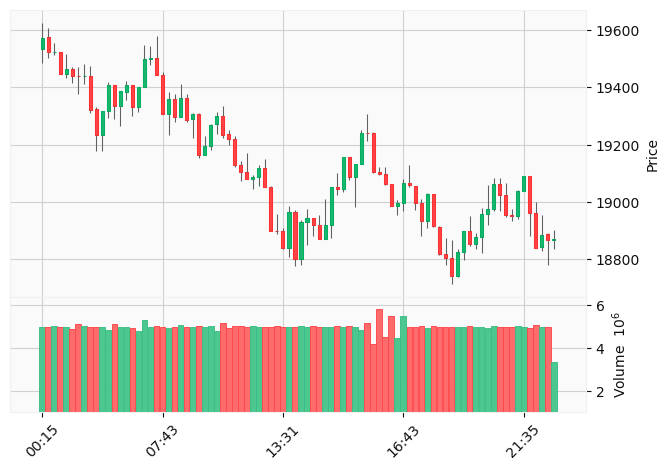

In [75]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

In [164]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])

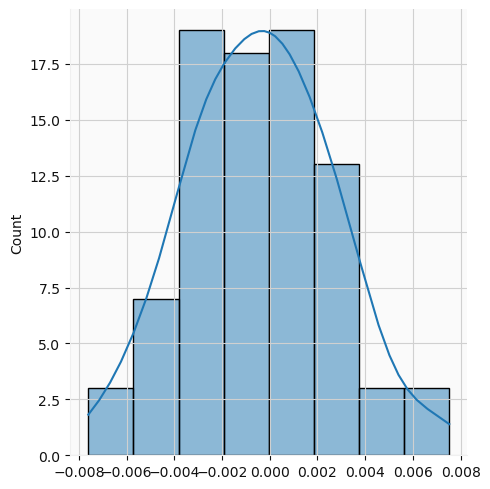

In [165]:
sns.displot(log_returns, kde=True)

In [166]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.10966782488862814
Durbin-Watson Statistic: 1.738347435687718
Jarque-Bera p-value 0.8799125815245011
Shapiro-Wilk p-value 0.9952776432037354


### Dollars Bars

In [169]:
agg_bars = bars.aggregate_dollar_bars(ticks, 90*10**9)

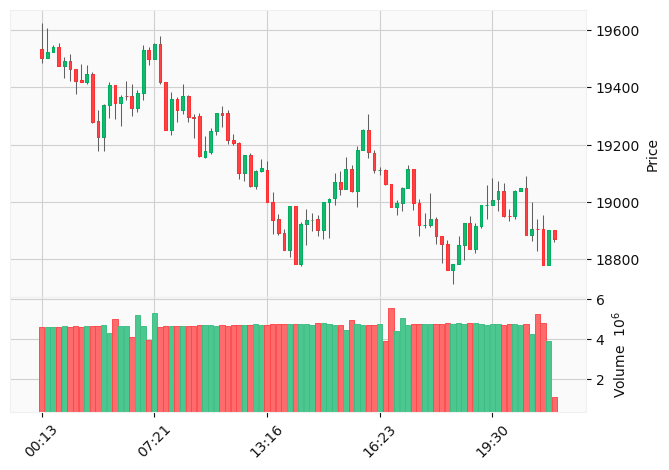

In [170]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

In [171]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])

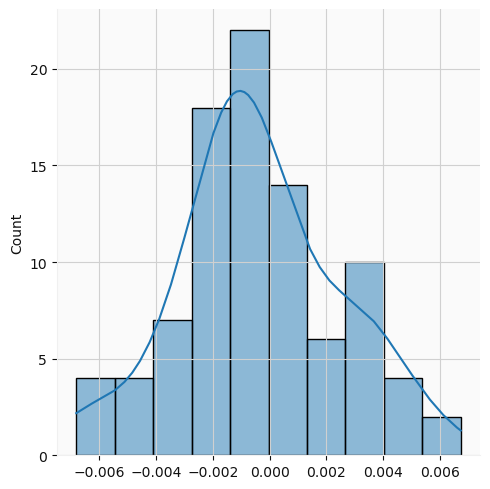

In [172]:
sns.displot(log_returns, kde=True)

In [173]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.19101690098755836
Durbin-Watson Statistic: 1.5803817558017
Jarque-Bera p-value 0.8796179558133157
Shapiro-Wilk p-value 0.32940205931663513


## Information-Driven Bars

### Tick Imbalance Bars

In [44]:
agg_bars, ticks_ext = bars.aggregate_imblance_bars(
    ticks,
    bar_unit=BarUnit.TICK,
    min_bar_size=500,
    max_bar_size=5000,
    b0=-1,
    E_T_init=1000,
#     abs_E_b_init=0.2,
    T_ewma_window=None,
    b_ewma_window=None,
    debug=True
)

Init: E_T=1000,abs_E_b=0.088,threshold=88.0
Bar: size=500.0,num_ticks=500.0,end_tick=499
  Expect: E_T=500.0,abs_E_b=0.30396564366156986,threshold=151.98282183078493
Bar: size=500.0,num_ticks=500.0,end_tick=999
  Expect: E_T=500.0,abs_E_b=0.1103455893491826,threshold=55.172794674591294
Bar: size=500.0,num_ticks=500.0,end_tick=1499
  Expect: E_T=500.0,abs_E_b=0.006796574949874547,threshold=3.3982874749372733
Bar: size=500.0,num_ticks=500.0,end_tick=1999
  Expect: E_T=499.99999999999994,abs_E_b=0.15838777705680296,threshold=79.19388852840147
Bar: size=500.0,num_ticks=500.0,end_tick=2499
  Expect: E_T=500.00000000000006,abs_E_b=0.042516163676370254,threshold=21.25808183818513
Bar: size=500.0,num_ticks=500.0,end_tick=2999
  Expect: E_T=500.00000000000006,abs_E_b=0.03192934137159,threshold=15.964670685795003
Bar: size=500.0,num_ticks=500.0,end_tick=3499
  Expect: E_T=500.0,abs_E_b=0.011314883013114474,threshold=5.657441506557237
Bar: size=500.0,num_ticks=500.0,end_tick=3999
  Expect: E_T=50

  Expect: E_T=560.9772741737274,abs_E_b=0.2367719646154486,threshold=132.8236913107326
Bar: size=673.0,num_ticks=673.0,end_tick=56048
  Expect: E_T=563.3533272057555,abs_E_b=0.07522458147669679,threshold=42.37801826255758
Bar: size=500.0,num_ticks=500.0,end_tick=56548
  Expect: E_T=561.79459150227,abs_E_b=0.009848949950439126,threshold=5.533086814133251
Bar: size=500.0,num_ticks=500.0,end_tick=57048
  Expect: E_T=560.2989229286342,abs_E_b=0.031153390997398313,threshold=17.455211421416884
Bar: size=500.0,num_ticks=500.0,end_tick=57548
  Expect: E_T=558.8629131488466,abs_E_b=0.10629280572946313,threshold=59.403107056732175
Bar: size=500.0,num_ticks=500.0,end_tick=58048
  Expect: E_T=557.4833803049238,abs_E_b=0.031068602796646784,threshold=17.320229708425657
Bar: size=500.0,num_ticks=500.0,end_tick=58548
  Expect: E_T=556.1573513362796,abs_E_b=0.05598439986945831,threshold=31.136135547549088
Bar: size=500.0,num_ticks=500.0,end_tick=59048
  Expect: E_T=554.8820458743296,abs_E_b=0.035766007

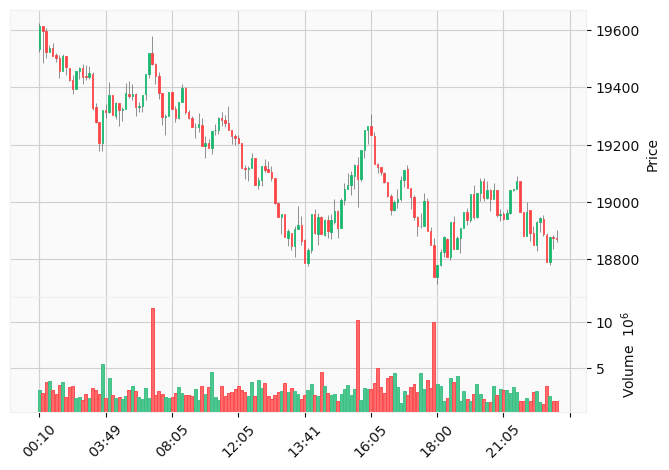

In [32]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

<AxesSubplot:xlabel='timestamp'>

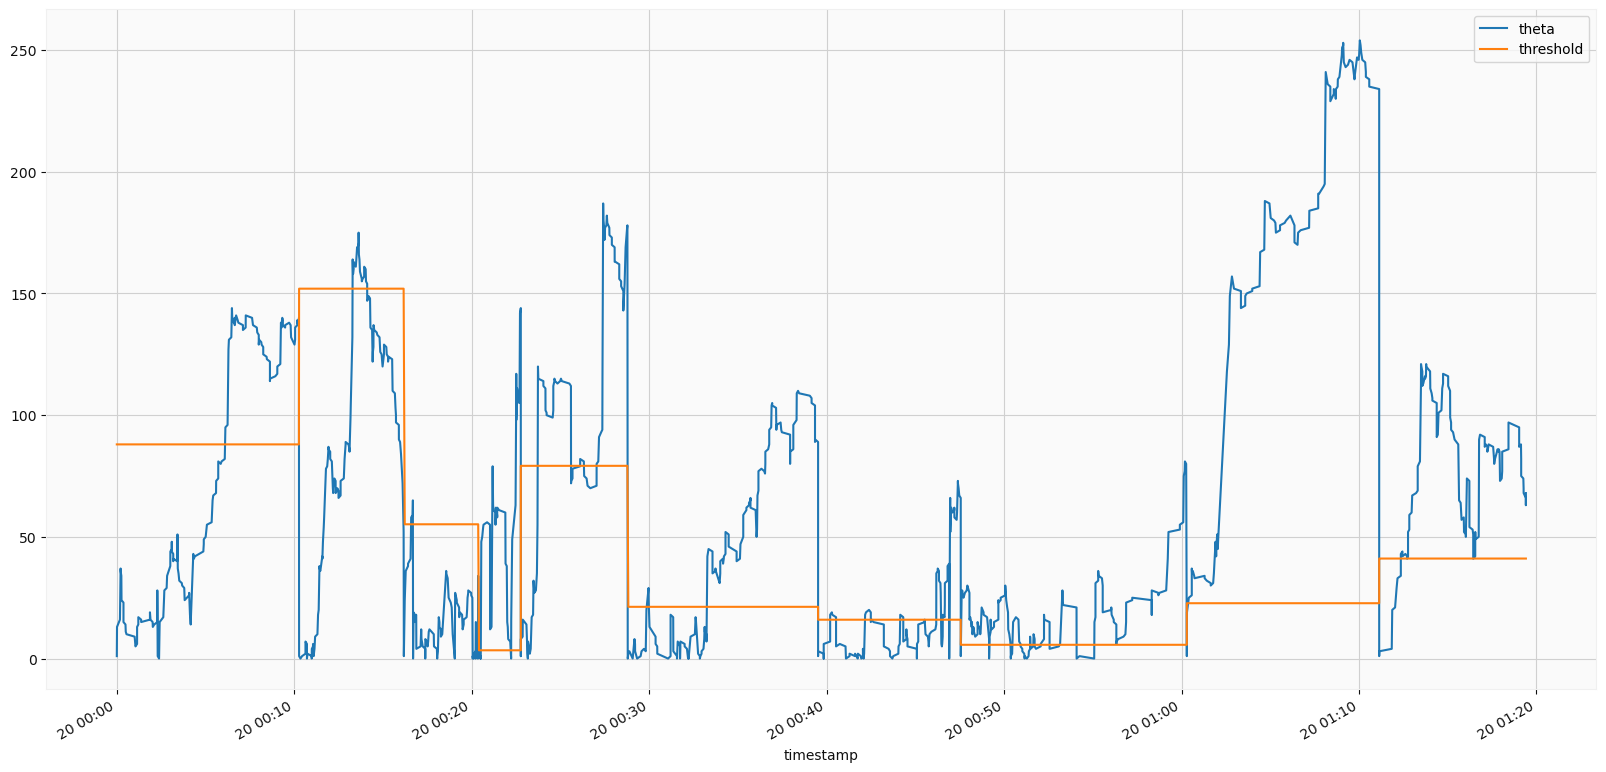

In [34]:
ticks_ext.iloc[:5000].set_index('timestamp')[['theta', 'threshold']].plot(figsize=(20, 10))

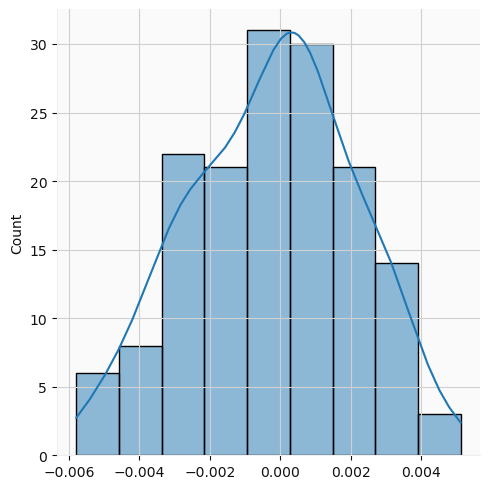

In [45]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])
sns.displot(log_returns, kde=True)

In [37]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.2099012237628095
Durbin-Watson Statistic: 1.558833069351914
Jarque-Bera p-value 0.2817631313940985
Shapiro-Wilk p-value 0.33848872780799866


### Volume Imbalance Bars

In [15]:
agg_bars, ticks_ext = bars.aggregate_imblance_bars(
    ticks,
    bar_unit=BarUnit.VOLUME,
    min_bar_size=1*10**6,
    max_bar_size=5*10**6,
    b0=-1,
    E_T_init=1000,
#     abs_E_b_init=0.1,
    T_ewma_window=None,
    b_ewma_window=None,
    debug=True
)

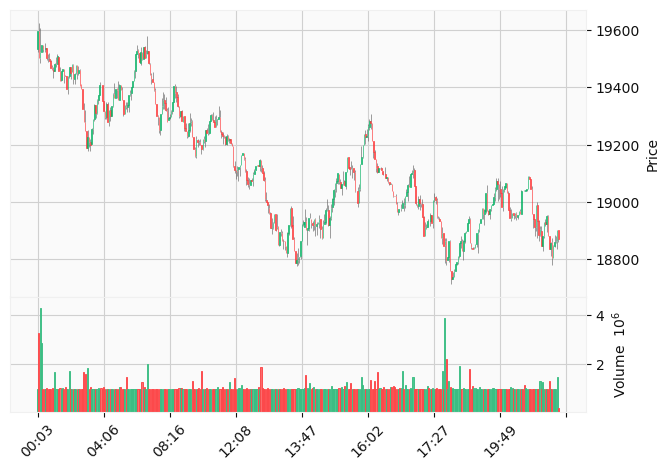

In [48]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

<AxesSubplot:xlabel='timestamp'>

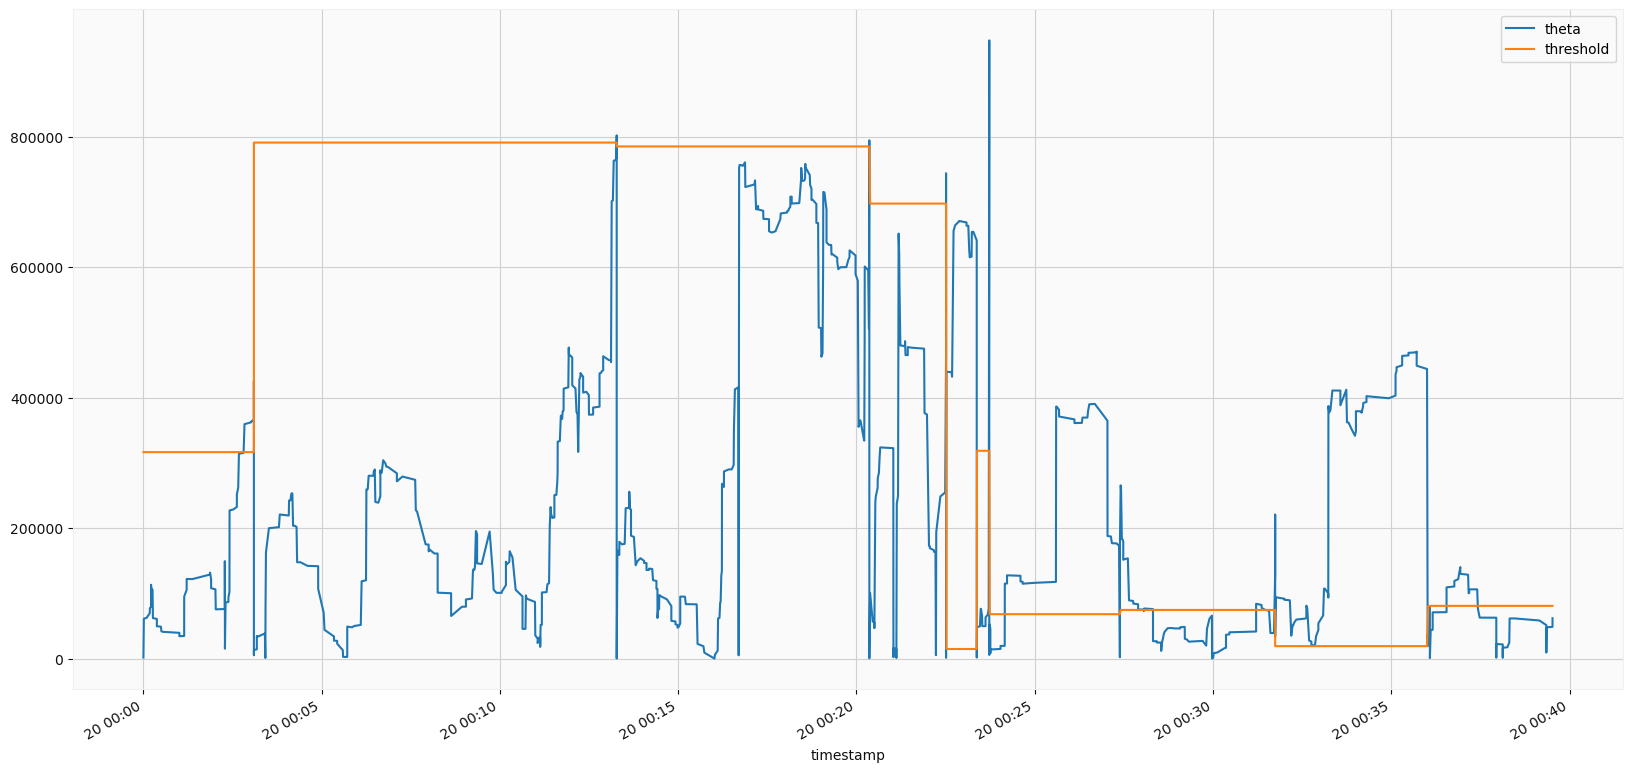

In [51]:
ticks_ext.iloc[:3000].set_index('timestamp')[['theta', 'threshold']].plot(figsize=(20, 10))

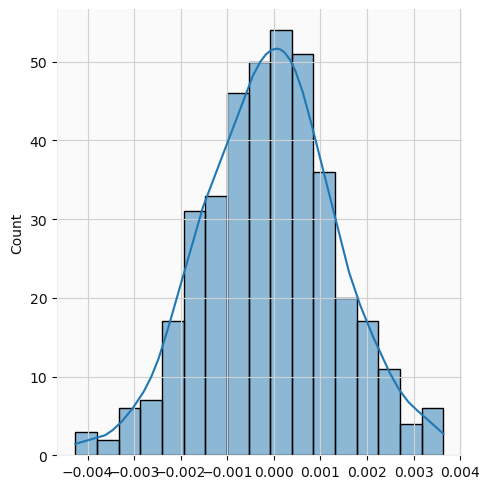

In [52]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])
sns.displot(log_returns, kde=True)

In [54]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.3087574795502356
Durbin-Watson Statistic: 1.3757873234104296
Jarque-Bera p-value 0.9782610352523546
Shapiro-Wilk p-value 0.7871331572532654


### Dollars Imbalance Bars

In [56]:
agg_bars, ticks_ext = bars.aggregate_imblance_bars(
    ticks,
    bar_unit=BarUnit.DOLLARS,
    min_bar_size=1*10**6*20000,
    max_bar_size=5*10**6*20000,
    b0=-1,
    E_T_init=1000,
    # abs_E_b_init=10000,
    T_ewma_window=None,
    b_ewma_window=None,
    debug=True
)

Init: E_T=1000,abs_E_b=6166410.05,threshold=6166410050.0
Bar: size=20070365300.0,num_ticks=190.0,end_tick=189
  Expect: E_T=190.0,abs_E_b=72807956.87609942,threshold=13833511806.45889
Bar: size=62163332100.0,num_ticks=515.0,end_tick=704
  Expect: E_T=433.75,abs_E_b=32914278.185198754,threshold=14276568162.82996
Bar: size=45556653850.0,num_ticks=428.0,end_tick=1132
  Expect: E_T=418.85714285714283,abs_E_b=35391542.70431208,threshold=14824000458.434715
Bar: size=68268920600.0,num_ticks=569.0,end_tick=1701
  Expect: E_T=483.56617647058823,abs_E_b=32075060.880537823,threshold=15510414550.063013
Bar: size=20128147950.0,num_ticks=192.0,end_tick=1893
  Expect: E_T=365.3364928909953,abs_E_b=3718509.2308960315,threshold=1358507121.1983485
Bar: size=20091430850.0,num_ticks=44.0,end_tick=1937
  Expect: E_T=262.5268172194778,abs_E_b=16000768.038149523,threshold=4200630706.122542
Bar: size=20038743800.0,num_ticks=195.0,end_tick=2132
  Expect: E_T=250.28287666408397,abs_E_b=3251179.296593324,thresho

  Expect: E_T=223.16211220752092,abs_E_b=1946848.0190323489,threshold=434462716.0742869
Bar: size=20048212950.0,num_ticks=212.0,end_tick=38543
  Expect: E_T=223.03587130129182,abs_E_b=2006225.5482220787,threshold=447460263.1746232
Bar: size=20008653750.0,num_ticks=238.0,end_tick=38781
  Expect: E_T=223.2639276767528,abs_E_b=2916149.808808894,threshold=651071060.0084853
Bar: size=20127782850.0,num_ticks=205.0,end_tick=38986
  Expect: E_T=223.0425836331183,abs_E_b=11212931.00897197,threshold=2500961102.3410163
Bar: size=20178878850.0,num_ticks=237.0,end_tick=39223
  Expect: E_T=223.2538766835185,abs_E_b=21877476.769978143,threshold=4884231500.9512415
Bar: size=26884762250.0,num_ticks=211.0,end_tick=39434
  Expect: E_T=223.1143872667005,abs_E_b=20648169.5171855,threshold=4606903690.005806
Bar: size=22862610500.0,num_ticks=201.0,end_tick=39635
  Expect: E_T=222.8456122832457,abs_E_b=9888494.796810992,threshold=2203607677.555035
Bar: size=26615083150.0,num_ticks=456.0,end_tick=40091
  Expec

  Expect: E_T=221.79059389347677,abs_E_b=14263992.428323794,threshold=3163619351.9699903
Bar: size=20142020700.0,num_ticks=208.0,end_tick=57610
  Expect: E_T=221.68090597055047,abs_E_b=23505348.420292314,threshold=5210686932.963847
Bar: size=31407294300.0,num_ticks=187.0,end_tick=57797
  Expect: E_T=221.3837798105199,abs_E_b=16177105.77386131,threshold=3581348822.6120024
Bar: size=20401609500.0,num_ticks=70.0,end_tick=57867
  Expect: E_T=220.04217854499532,abs_E_b=392493.2511175899,threshold=86365070.0401224
Bar: size=21095652400.0,num_ticks=186.0,end_tick=58053
  Expect: E_T=219.75706375545218,abs_E_b=11551999.676948829,threshold=2538633529.5102067
Bar: size=20520138550.0,num_ticks=10.0,end_tick=58063
  Expect: E_T=217.91040075306407,abs_E_b=2934400.611570237,threshold=639436413.2373067
Bar: size=20084382250.0,num_ticks=192.0,end_tick=58255
  Expect: E_T=217.70471750777503,abs_E_b=4621311.079105898,threshold=1006081222.9923005
Bar: size=23433632900.0,num_ticks=210.0,end_tick=58465
  E

Bar: size=20005351350.0,num_ticks=166.0,end_tick=71440
  Expect: E_T=215.5343597833705,abs_E_b=12395746.79669088,threshold=2671709349.861534
Bar: size=20127696000.0,num_ticks=356.0,end_tick=71796
  Expect: E_T=216.54874755743535,abs_E_b=9658003.167625157,threshold=2091428489.8549712
Bar: size=20011221050.0,num_ticks=282.0,end_tick=72078
  Expect: E_T=217.02556551615763,abs_E_b=889943.0910109788,threshold=193140402.603855
Bar: size=20378237300.0,num_ticks=324.0,end_tick=72402
  Expect: E_T=217.79356868467931,abs_E_b=3056603.0535476017,threshold=665708487.0846201
Bar: size=20104575050.0,num_ticks=379.0,end_tick=72781
  Expect: E_T=218.94000840410646,abs_E_b=5203721.943965178,threshold=1139302926.1443694
Bar: size=20100187300.0,num_ticks=194.0,end_tick=72975
  Expect: E_T=218.771836150003,abs_E_b=5044390.48475939,threshold=1103570568.6084156
Bar: size=20242787500.0,num_ticks=216.0,end_tick=73191
  Expect: E_T=218.759869936264,abs_E_b=1208702.6620682797,threshold=264415637.14567295
Bar: si

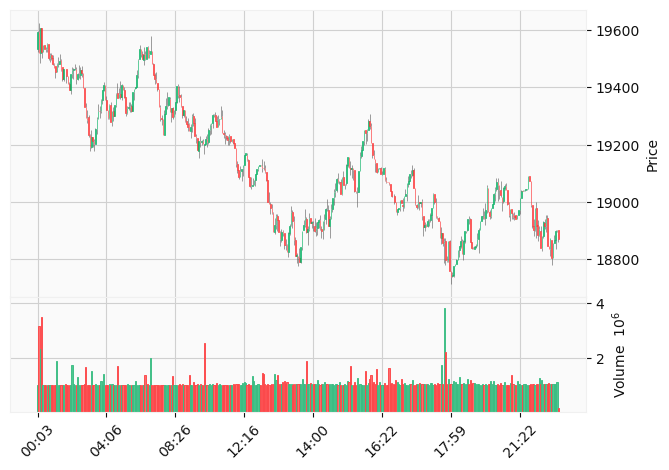

In [57]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

<AxesSubplot:xlabel='timestamp'>

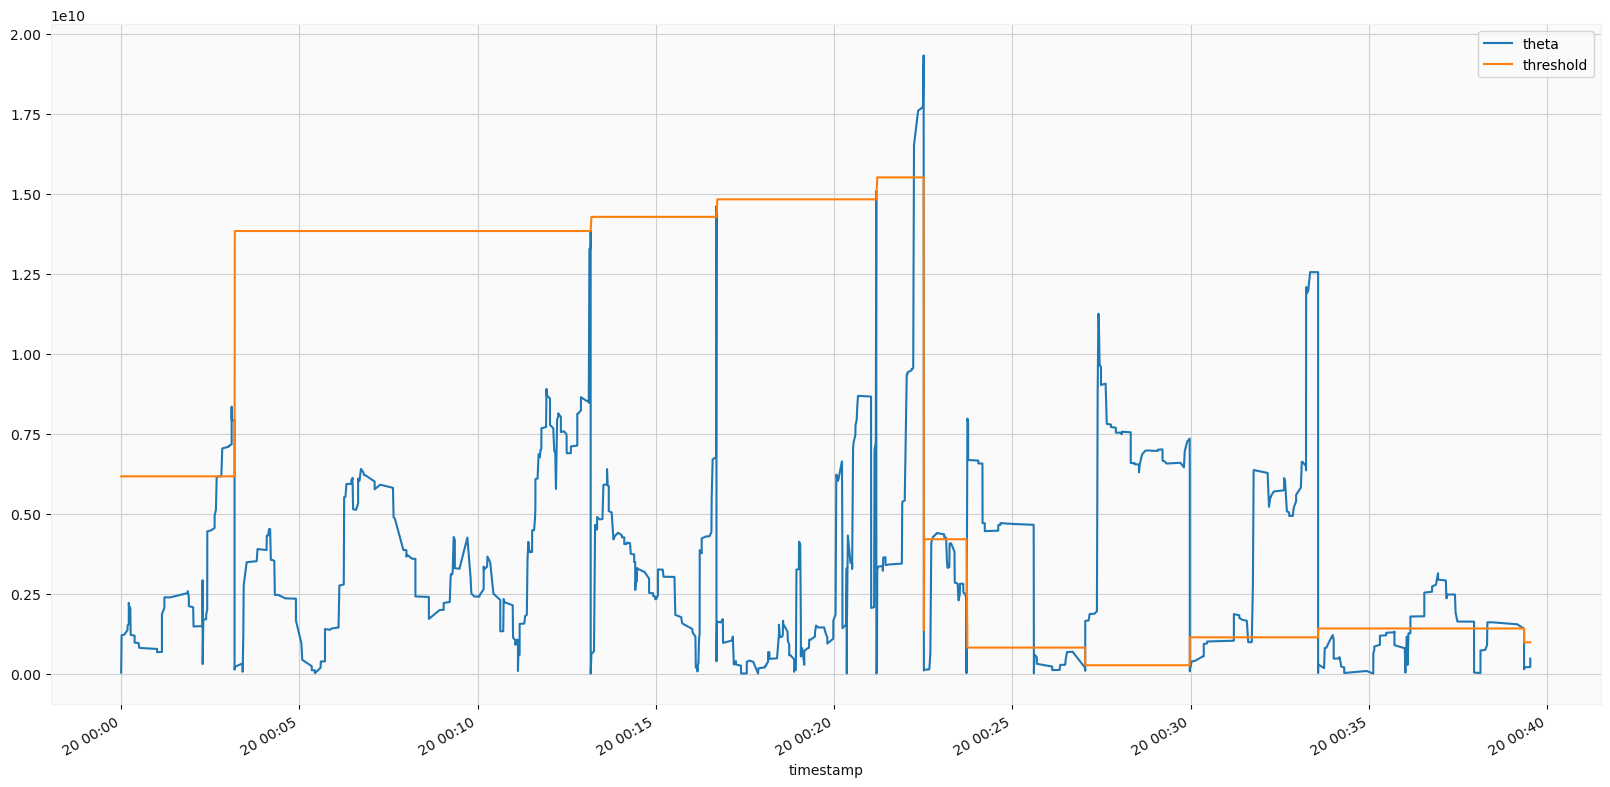

In [58]:
ticks_ext.iloc[:3000].set_index('timestamp')[['theta', 'threshold']].plot(figsize=(20, 10))

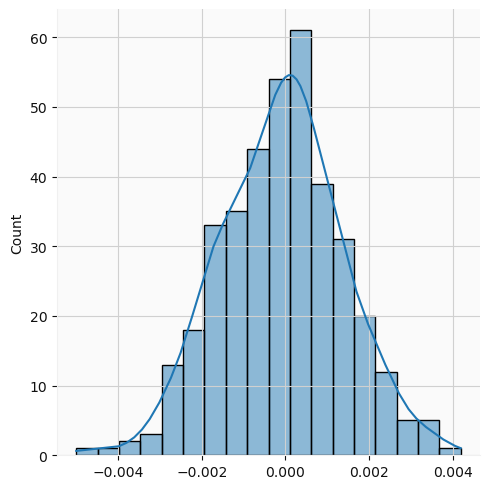

In [59]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])
sns.displot(log_returns, kde=True)

In [60]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.28002781441544755
Durbin-Watson Statistic: 1.4324278619849302
Jarque-Bera p-value 0.8866698964183337
Shapiro-Wilk p-value 0.9361801743507385


### Tick Runs Bars

In [5]:
agg_bars, ticks_ext = bars.aggregate_runs_bars(
    ticks,
    bar_unit=BarUnit.TICK,
    min_bar_size=500,
    max_bar_size=5000,
    b0=-1,
    E_T_init=1000,
    P_b_buy_init=None,
    E_v_buy_init=None,
    E_v_sell_init=None,
    T_ewma_window=None,
    b_ewma_window=None,
    debug=True
)

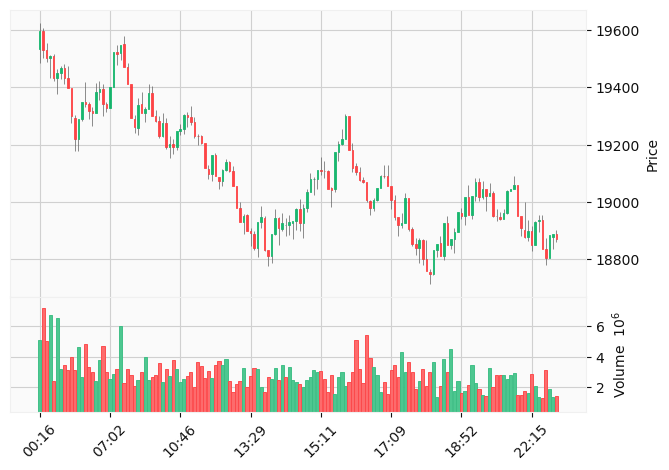

In [6]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

<AxesSubplot:xlabel='timestamp'>

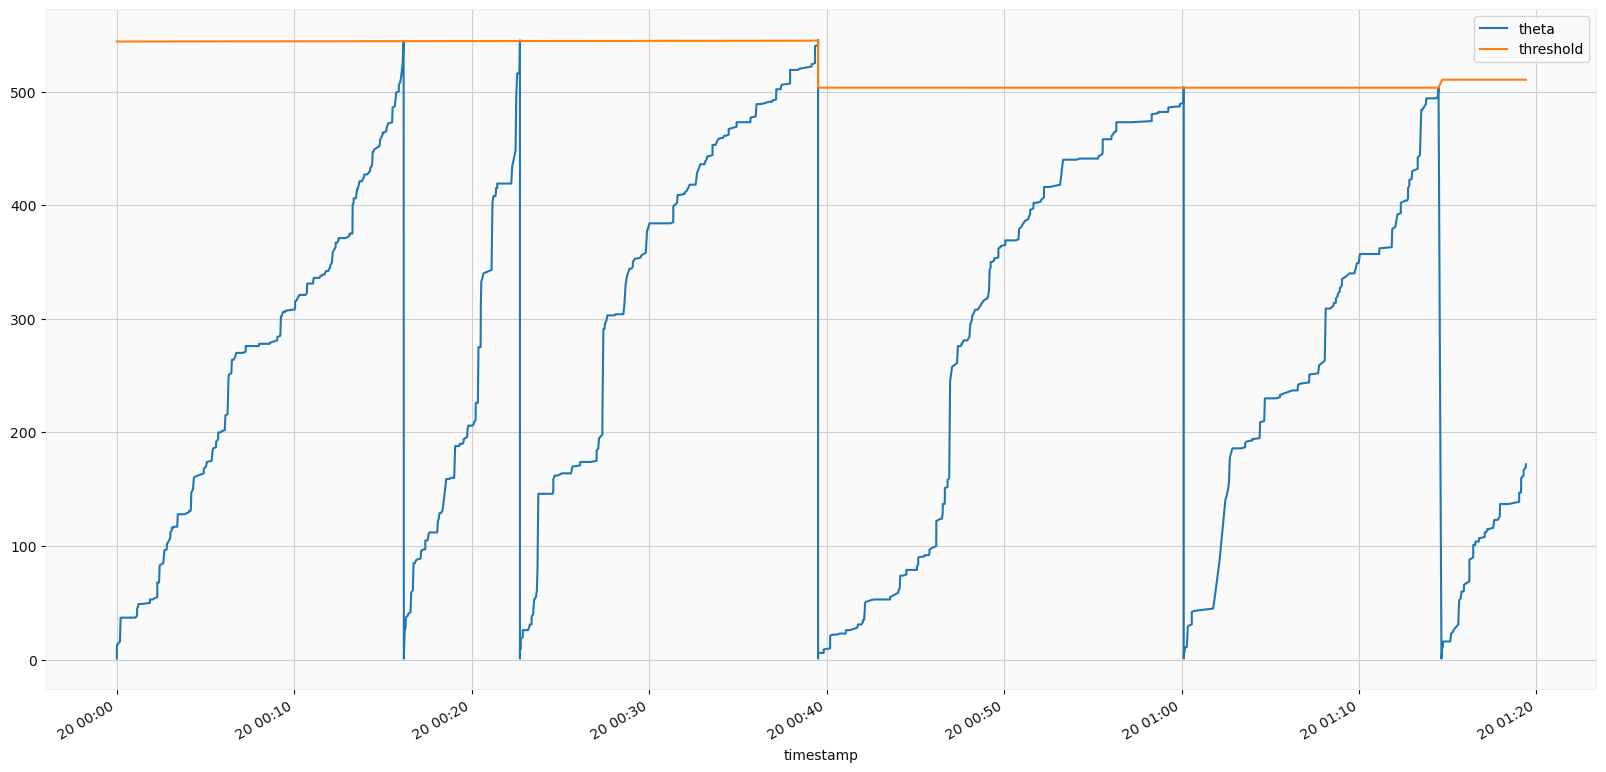

In [10]:
ticks_ext.iloc[:5000].set_index('timestamp')[['theta', 'threshold']].plot(figsize=(20, 10))

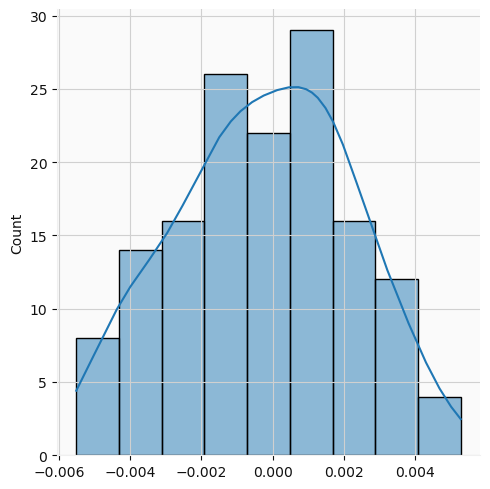

In [11]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])
sns.displot(log_returns, kde=True)

In [12]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.19472062484145017
Durbin-Watson Statistic: 1.5922751631068657
Jarque-Bera p-value 0.21582403235118633
Shapiro-Wilk p-value 0.17961347103118896


### Volume Runs Bars

In [16]:
agg_bars, ticks_ext = bars.aggregate_runs_bars(
    ticks,
    bar_unit=BarUnit.VOLUME,
    min_bar_size=1*10**6,
    max_bar_size=5*10**6,
    b0=-1,
    E_T_init=1000,
    P_b_buy_init=None,
    E_v_buy_init=None,
    E_v_sell_init=None,
    T_ewma_window=None,
    b_ewma_window=None,
    debug=True
)

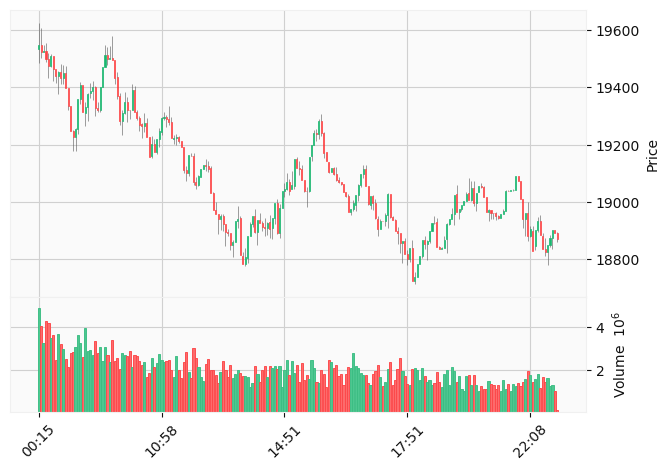

In [17]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

<AxesSubplot:xlabel='timestamp'>

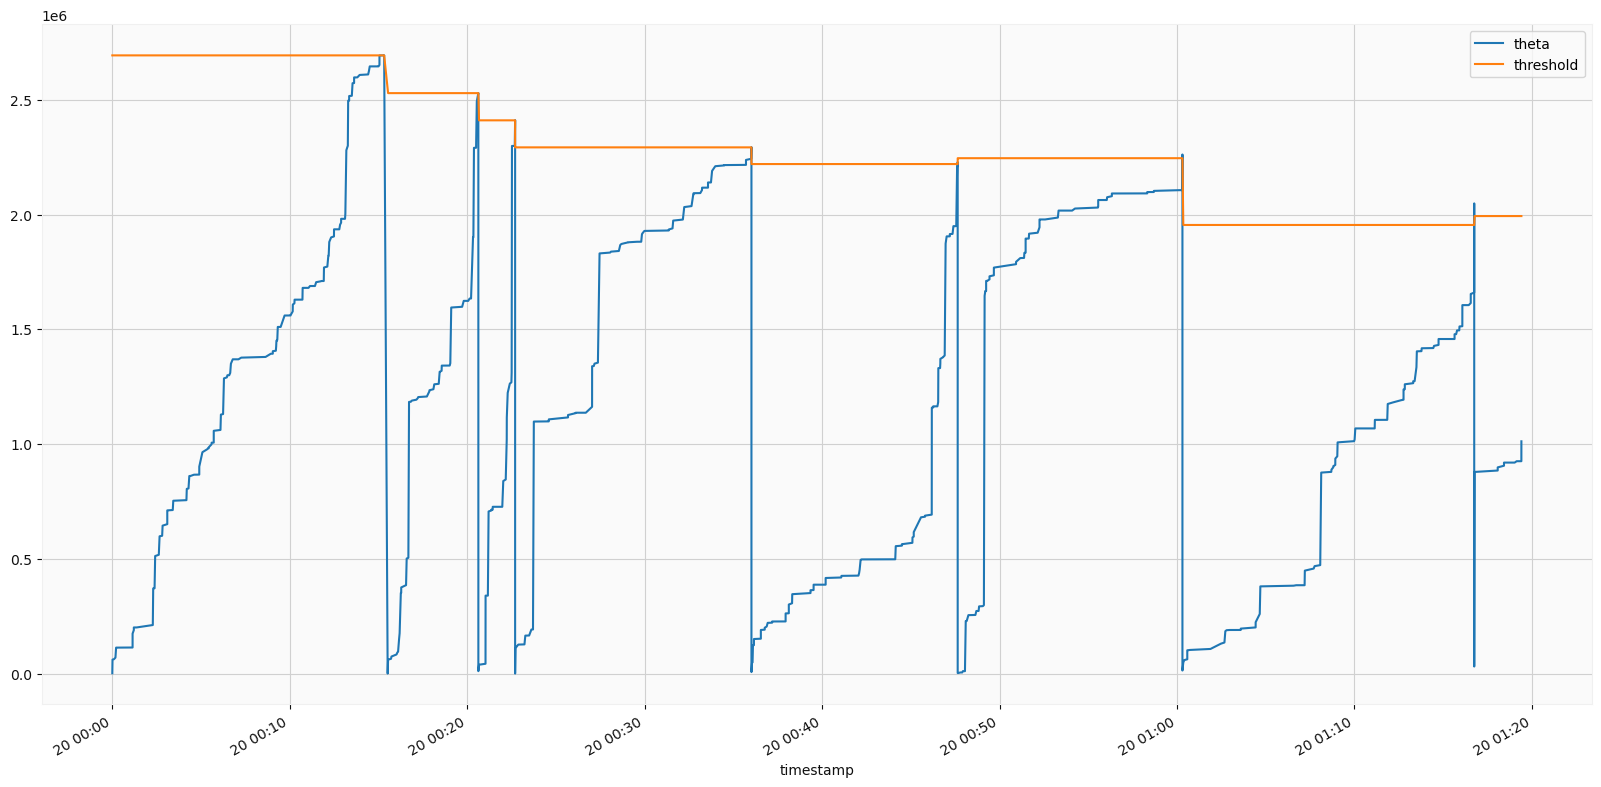

In [18]:
ticks_ext.iloc[:5000].set_index('timestamp')[['theta', 'threshold']].plot(figsize=(20, 10))

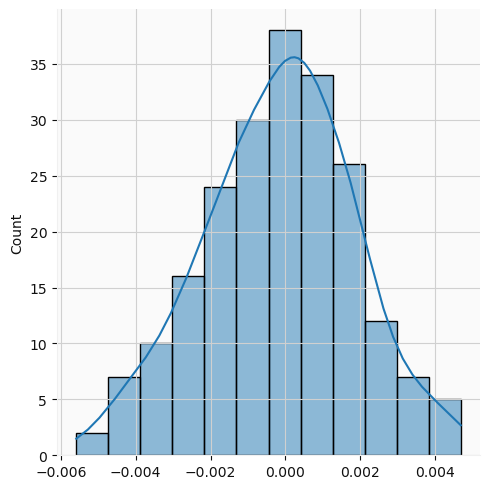

In [19]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])
sns.displot(log_returns, kde=True)

In [20]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.2735342550855428
Durbin-Watson Statistic: 1.4408265344462434
Jarque-Bera p-value 0.6440942420042934
Shapiro-Wilk p-value 0.6926668882369995


### Dollars Runs Bars

In [21]:
agg_bars, ticks_ext = bars.aggregate_runs_bars(
    ticks,
    bar_unit=BarUnit.DOLLARS,
    min_bar_size=1*10**6*20000,
    max_bar_size=5*10**6*20000,
    b0=-1,
    E_T_init=1000,
    P_b_buy_init=None,
    E_v_buy_init=None,
    E_v_sell_init=None,
    T_ewma_window=None,
    b_ewma_window=None,
    debug=True
)

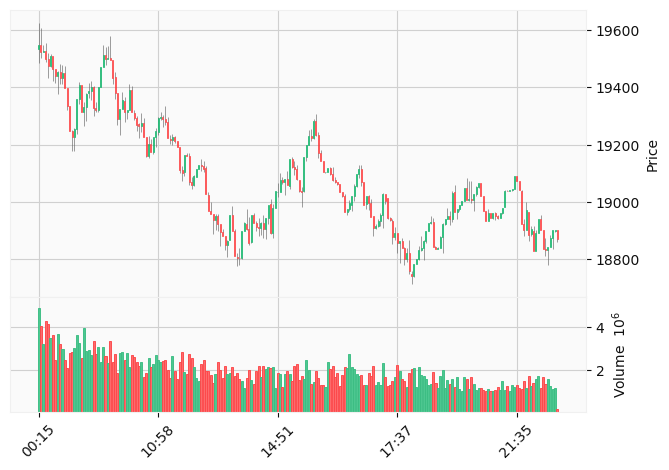

In [22]:
mpf.plot(cap_cols(agg_bars), style='yahoo', type='candle', volume=True)

<AxesSubplot:xlabel='timestamp'>

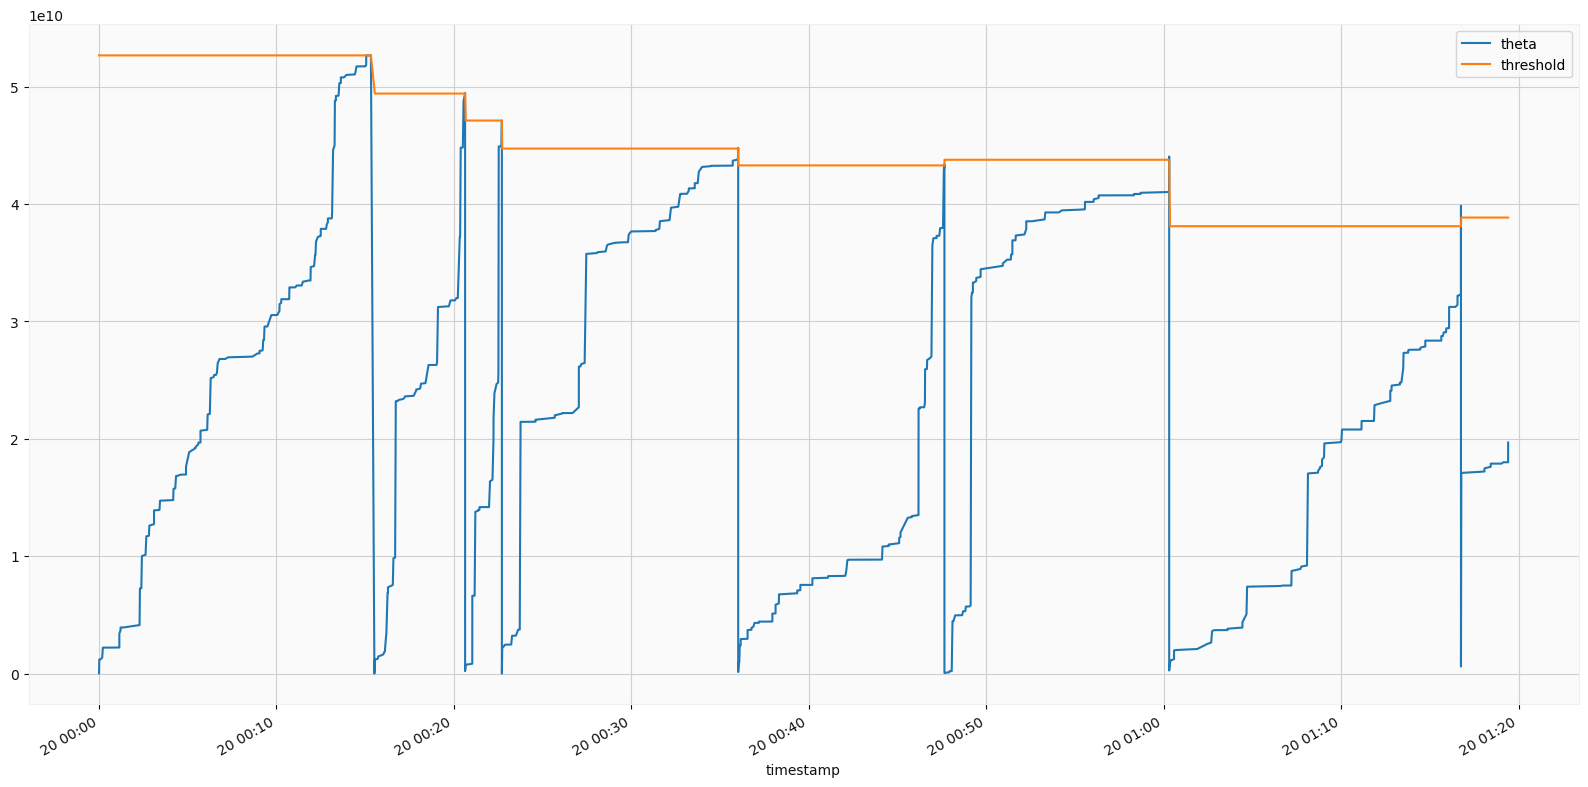

In [23]:
ticks_ext.iloc[:5000].set_index('timestamp')[['theta', 'threshold']].plot(figsize=(20, 10))

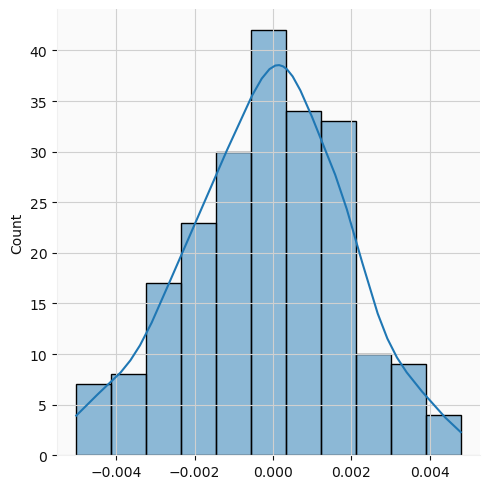

In [24]:
log_returns = compute_log_returns(agg_bars[PRICE_COL])
sns.displot(log_returns, kde=True)

In [25]:
print('Pearson Autocorrelation:', pearson_autocorr(log_returns, lag=1))
print('Durbin-Watson Statistic:', durbin_watson_stat(log_returns))
print('Jarque-Bera p-value', jarque_bera_pval(log_returns))
print('Shapiro-Wilk p-value', shapiro_wilk_pval(log_returns))

Pearson Autocorrelation: 0.2507714974877352
Durbin-Watson Statistic: 1.4881890056296703
Jarque-Bera p-value 0.5656815728010616
Shapiro-Wilk p-value 0.41247037053108215
